# Create the loan predictor by using the above mentioned dataset.

# Apply Full EDA, like missing values and outliers.

# Plot some graphs like count plot, heatmap etc which are showing some good insight from the dataset.

# Try converting the categorical column into the numerical column using appropriate encoding technique.

# Apply features scaling if required.

# Use different models to get best results from each.

# Save the model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Loan_status.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# lets check the missing values

In [7]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Plotting the heatmap

<Axes: >

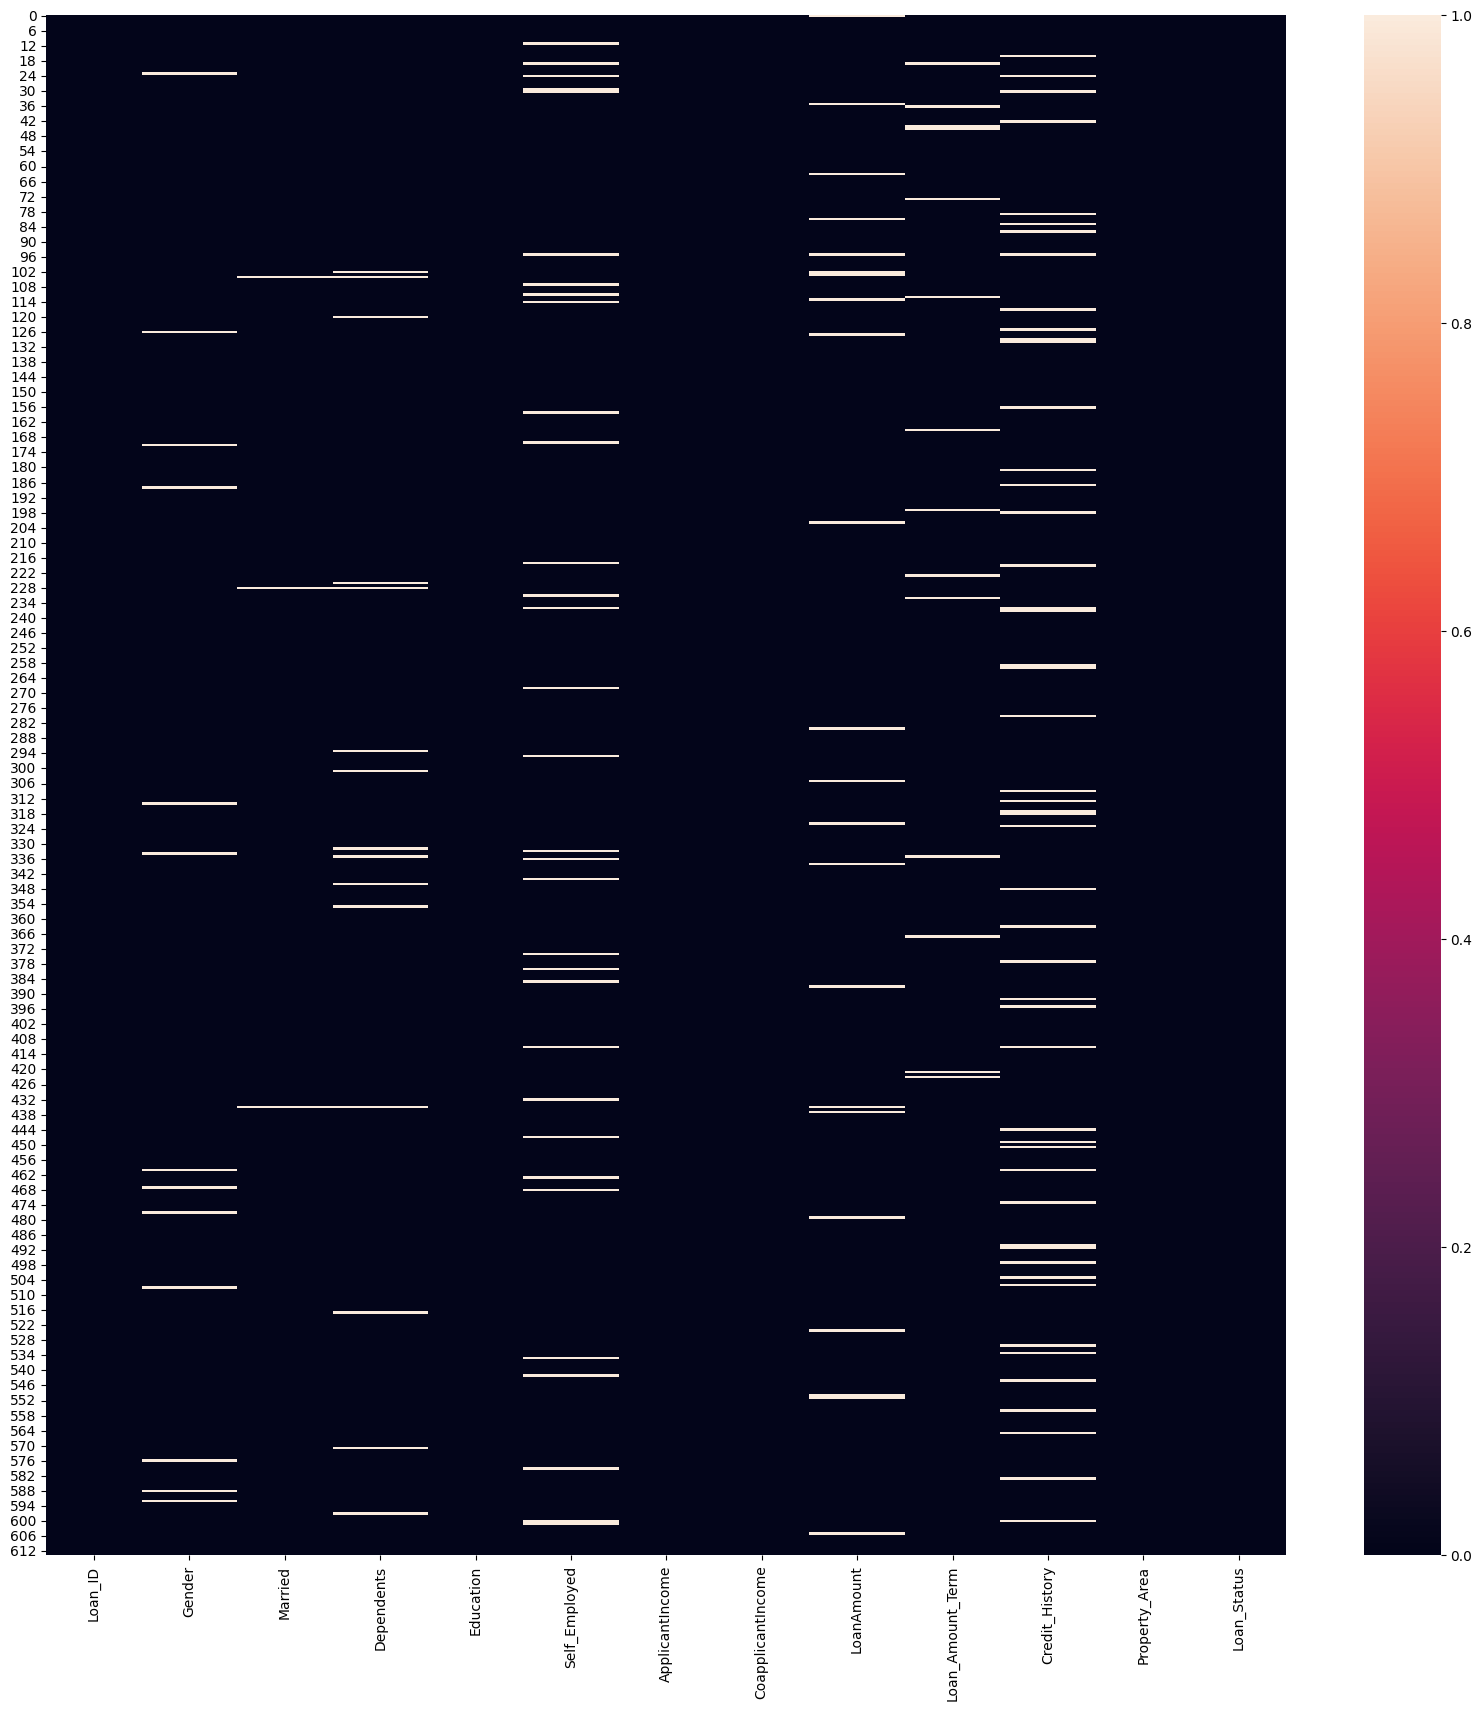

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isnull())

In [9]:
data.shape

(614, 13)

# in data set 3+ value are given changing into 4

In [10]:
data['Dependents'] = data['Dependents'].replace(['3+'], '4')

In [11]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [12]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# replacing values

In [13]:
data['Property_Area'].replace(['Semiurban', 'Rural' ,'Urban'],
 [1,2,3],inplace=True)

In [14]:
data['Self_Employed'].replace(['Yes','No'],
 [0,1],inplace=True)

In [15]:
data['Education'].replace(['Graduate', 'Not Graduate'],
                        [0,1], inplace=True)

In [16]:
data['Married'].replace(['Yes', 'No'],
                        [0,1], inplace=True)

In [17]:
data['Gender'].replace(['Male', 'Female'],
                        [0,1], inplace=True)

In [18]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,1.0,0,0,1.0,5849,0.0,NaN,360.0,1.0,3,Y
1,LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,3,Y
3,LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,3,Y
4,LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,3,Y
5,LP001011,0.0,0.0,2,0,0.0,5417,4196.0,267.0,360.0,1.0,3,Y
6,LP001013,0.0,0.0,0,1,1.0,2333,1516.0,95.0,360.0,1.0,3,Y
7,LP001014,0.0,0.0,4,0,1.0,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,0.0,0.0,2,0,1.0,4006,1526.0,168.0,360.0,1.0,3,Y
9,LP001020,0.0,0.0,1,0,1.0,12841,10968.0,349.0,360.0,1.0,1,N


In [19]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.186356,0.348609,0.218241,0.859107,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.949511
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000
75%,0.000000,1.000000,0.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000


In [20]:
data.dtypes

,0
Loan_ID,object
Gender,float64
Married,float64
Dependents,object
Education,int64
Self_Employed,float64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# filling missing value

In [21]:
col = []
for i in data.columns:
  if data[i].dtype == 'object' :
     data[i]=data[i].fillna(data[i].mode()[0])

  else:
     data[i]=data[i].fillna(data[i].mean())

     col.append(i)

In [22]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# lets cheking otliyer

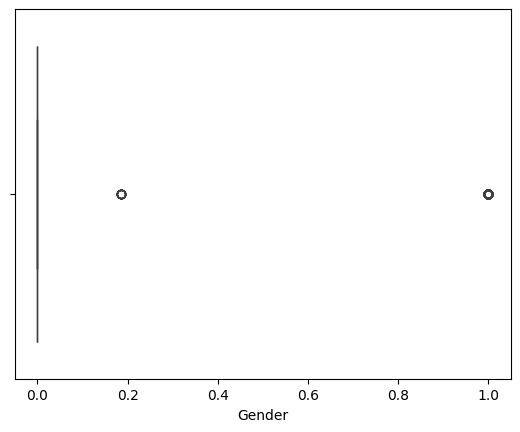

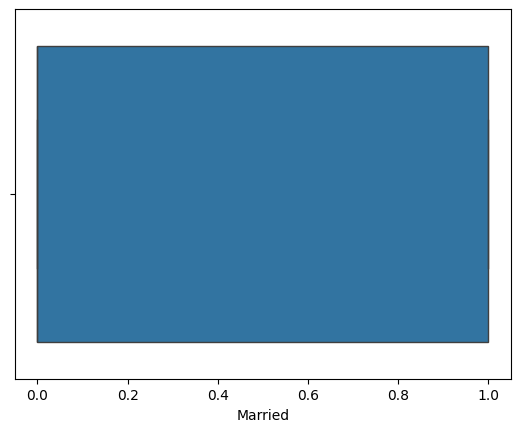

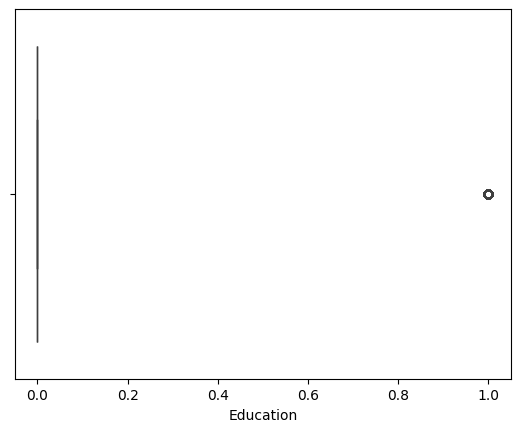

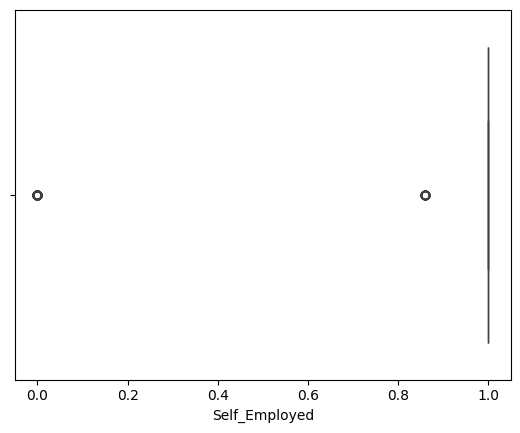

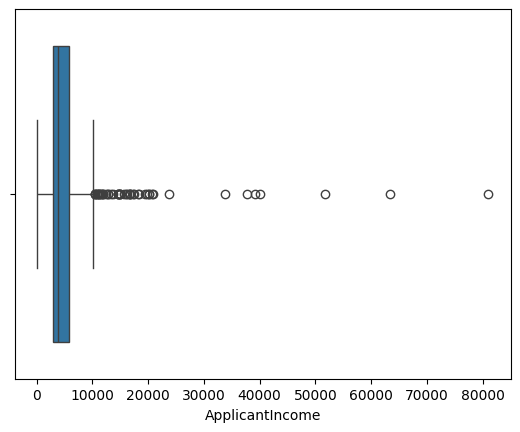

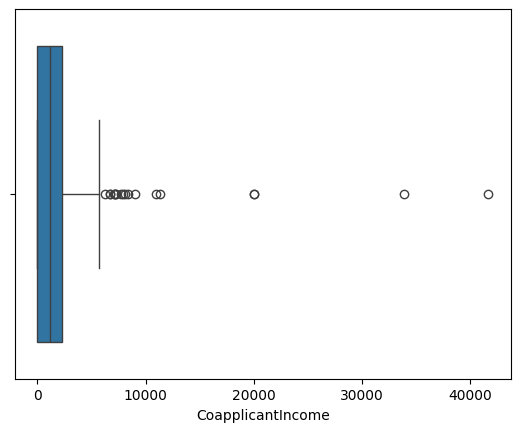

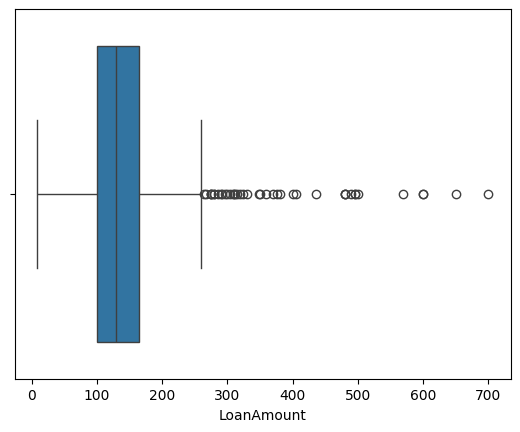

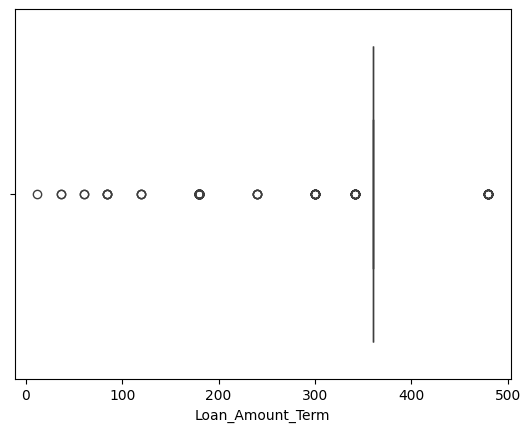

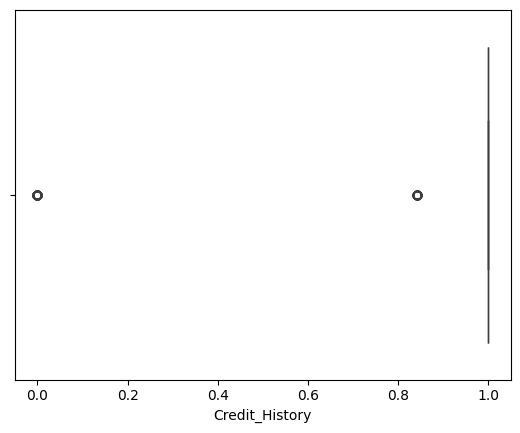

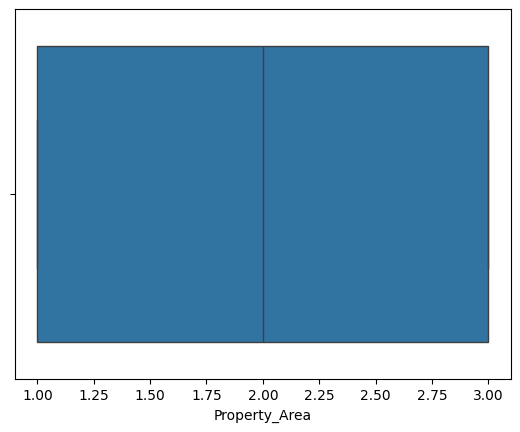

In [23]:
for i in col:
  sns.boxplot(x= data[i])
  plt.show(i)

In [24]:
col

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

# outlier handling

In [25]:
outliers = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in outliers:
  q1 = data[i].quantile(0.25)
  q2 = data[i].quantile(0.75)
  iqr = q2-q1

  data = data[(data[i]>=q1-1.5*iqr) & (data[i]<=q2+1.5*iqr)]

In [26]:
X = data.drop(['Loan_ID','Loan_Status'],axis=1)

In [27]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0,0,1.0,5849,0.0,146.412162,360.0,1.0,3
1,0.0,0.0,1,0,1.0,4583,1508.0,128.000000,360.0,1.0,2
2,0.0,0.0,0,0,0.0,3000,0.0,66.000000,360.0,1.0,3
3,0.0,0.0,0,1,1.0,2583,2358.0,120.000000,360.0,1.0,3
4,0.0,1.0,0,0,1.0,6000,0.0,141.000000,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,1,0,1.0,3400,2500.0,173.000000,360.0,1.0,1
607,0.0,0.0,2,1,1.0,3987,1411.0,157.000000,360.0,1.0,2
608,0.0,0.0,0,0,1.0,3232,1950.0,108.000000,360.0,1.0,2
609,1.0,1.0,0,0,1.0,2900,0.0,71.000000,360.0,1.0,2


In [28]:
y = data.replace({'Loan_Status':{"N":0,"Y":1}},inplace=True)

In [29]:
y = data['Loan_Status']

In [30]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
606,1
607,1
608,1
609,1


# applying train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.75, random_state=0)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254, 11)
(85, 11)
(254,)
(85,)


# Applying the standard Scaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [36]:
X_train_sc

array([[-0.50134118, -0.77948376,  1.03432216, ...,  0.        ,
         0.        ,  1.36632517],
       [-0.50134118, -0.77948376, -0.66063157, ...,  0.        ,
         0.        ,  1.36632517],
       [-0.50134118, -0.77948376,  1.03432216, ...,  0.        ,
         0.        , -1.11257906],
       ...,
       [-0.50134118,  1.28290036, -0.66063157, ...,  0.        ,
         0.        ,  1.36632517],
       [ 2.01731006, -0.77948376,  1.03432216, ...,  0.        ,
         0.        ,  1.36632517],
       [-0.50134118, -0.77948376, -0.66063157, ...,  0.        ,
         0.        , -1.11257906]])

In [37]:
X_test_sc

array([[-0.41210483,  1.38524226, -0.63785678, -0.5       ,  0.3457626 ,
         0.43498673, -0.9726855 , -0.52726767,  0.        ,  0.        ,
        -1.02633853],
       [-0.41210483, -0.73052861,  0.40479372, -0.5       , -3.08619485,
        -0.29756568,  0.76375105,  0.99486019,  0.        ,  0.        ,
        -1.02633853],
       [-0.41210483, -0.73052861, -0.63785678, -0.5       ,  0.3457626 ,
        -0.8638363 ,  1.04605772,  0.33527145,  0.        ,  0.        ,
         1.30002881],
       [-0.41210483, -0.73052861, -0.63785678, -0.5       ,  0.3457626 ,
        -0.05574734, -0.30450404, -0.2735797 ,  0.        ,  0.        ,
        -1.02633853],
       [-0.41210483, -0.73052861, -0.63785678, -0.5       ,  0.3457626 ,
         0.90848428, -0.9726855 ,  0.38600904,  0.        ,  0.        ,
         0.13684514],
       [-0.41210483, -0.73052861, -0.63785678, -0.5       , -3.08619485,
         3.00424322, -0.9726855 ,  1.45149854,  0.        ,  0.        ,
         0.136

# importing the algorithm : 1

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model1 = RandomForestClassifier(n_estimators = 100)

In [42]:
model1.fit(X_train_sc,y_train)

RandomForestClassifier()

In [43]:
y_pred = model1.predict(X_test_sc)

In [44]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
y_pred_df = pd.DataFrame(y_pred)

In [47]:
y_pred_df.value_counts()

,count
0,
1,83
0,2


In [50]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [51]:
confusion_matrix(y_test,y_pred)

array([[ 0, 10],
       [ 2, 73]])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.97      0.92        75

    accuracy                           0.86        85
   macro avg       0.44      0.49      0.46        85
weighted avg       0.78      0.86      0.82        85



# importing the algorithm : 2

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model2 = KNeighborsClassifier(n_neighbors=5)

In [55]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
y_pred = model2.predict(X_test)

In [57]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
y_test

,Loan_Status
134,1
470,1
388,1
281,1
420,1
...,...
383,1
292,1
141,1
1,0


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.97      0.92        75

    accuracy                           0.86        85
   macro avg       0.44      0.49      0.46        85
weighted avg       0.78      0.86      0.82        85



In [61]:
confusion_matrix(y_test,y_pred)

array([[ 0, 10],
       [ 2, 73]])

# importing the algorithm : 3

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
model3 = DecisionTreeClassifier()

In [67]:
model3.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = model3.predict(X_test_sc)

In [69]:
y_pred_df = pd.DataFrame(y_pred)

In [71]:
y_pred_df.value_counts()

,count
0,
1,76
0,9


In [73]:
y_test_df = pd.DataFrame(y_test)

In [74]:
y_test_df.value_counts()

,count
Loan_Status,
1,75
0,10


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.10      0.11        10
           1       0.88      0.89      0.89        75

    accuracy                           0.80        85
   macro avg       0.50      0.50      0.50        85
weighted avg       0.79      0.80      0.80        85



# Plotting the tree

In [76]:
from sklearn import tree
import matplotlib.pyplot as plt

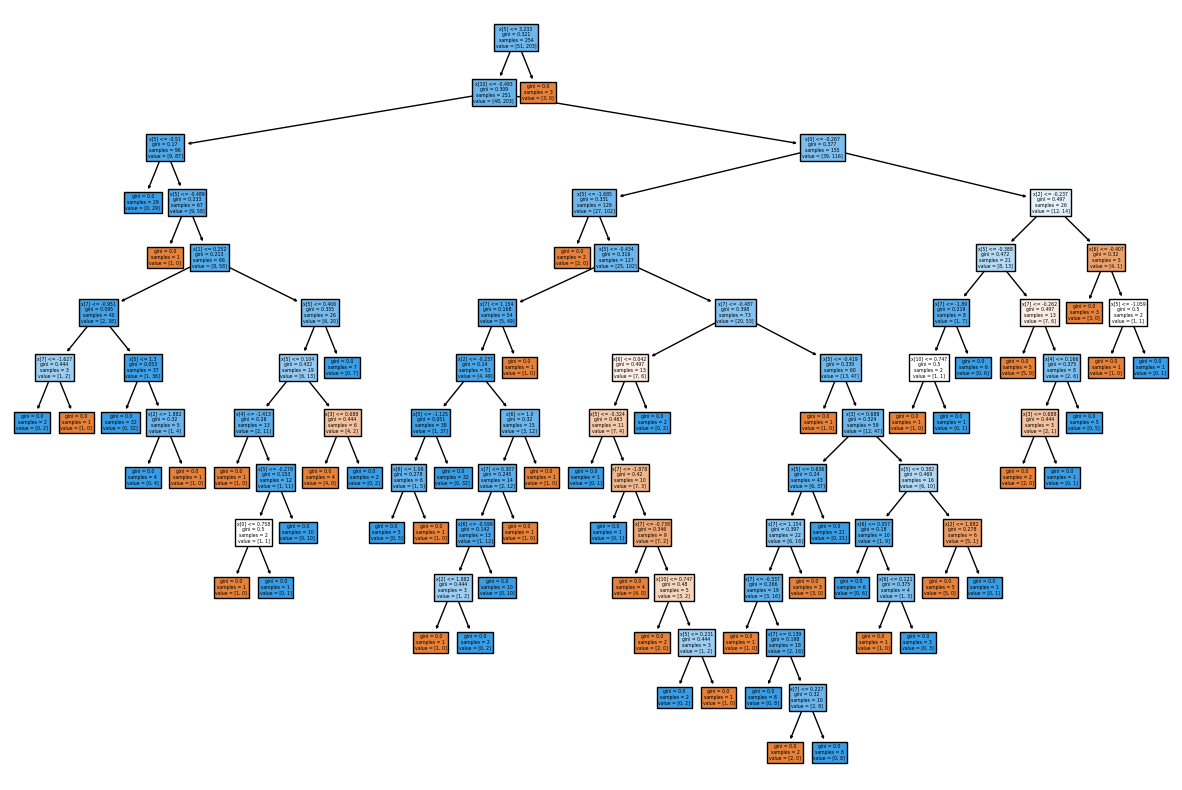

In [79]:
plt.figure(figsize=(15,10))
tree.plot_tree(model3 , filled = True)
plt.show()

# importing the algorithm : 4

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
model4 =AdaBoostClassifier()

In [82]:
model4.fit(X_train_sc,y_train)

AdaBoostClassifier()

In [83]:
y_pred = model4.predict(X_test_sc)

In [86]:
accuracy_score(y_test,y_pred)

0.8

# For Prediction data

In [87]:
i_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

# changing the input_data to numpy array
i_data_as_numpy_array = np.asarray(i_data)

# reshape the array
i_data_reshaped = i_data_as_numpy_array.reshape(1,-1)

# use randomforest object
prediction = model3.predict(i_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is not eligible for loan')
else:
  print('The person is eligible for loan')

[0]
The person is eligible for loan
